### Cement Strength Prediction with Neural Network

**Introduction**

We are going to build a regression model using neural network to predict cement strength. The data is provided by IBM as a part of the IBM AI Engineering Professional Certificate. We are going to use `Keras` to build our neural network regression model and optimize it. The entire process is divided into four parts (A, B, C and D). Detailed description of each part is provided below.

**Part A**

1. Import relevant libraries and data
2. Perform exploratory data analysis (EDA)
3. Divide the into train and test data sets
4. Build a baseline neural network model with one hidden layer with 10 nodes.
5. Train the data with 50 epochs and test it on test data.

In [86]:
# import libraries

from keras.src.layers import Dense
from keras.src.models import Sequential
from keras.src.layers import Input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [87]:
#import data

data = pd.read_csv('concrete_data.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Perform EDA**

In [88]:
data.shape

(1030, 9)

In [89]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [91]:
#check if data contains null values
data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [92]:
#identifying predictors and target

predictors = data[data.columns[data.columns != 'Strength']]
target = data['Strength']

In [93]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [94]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

**Build the Neural Network Regression Model**

We are going to build a neural network with one hidden layer with 10 nodes and a ReLU activation function. For optimization, we are using `adam` function and `MSE` as the loss function. 

$$MSE = \frac{1}{n} \sum^n_{i = 1} (y_{true, i} - y_{pred, i})^2$$

In [95]:
n_cols = predictors.shape[1]

In [96]:
#build the neural network

def regression_model():
    model = Sequential()
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [97]:
#initialize the model
model = regression_model()

In [98]:
lst_mse = []

for i in range(50):
    X_tr, X_test, y_tr, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
    model.fit(X_tr, y_tr, validation_split = 0.3, epochs = 50, verbose = 0)
    predictions = model.predict(X_test)
    lst_mse.append(mean_squared_error(y_test, predictions))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1

In [99]:
print(np.mean(lst_mse), np.std(lst_mse))

113.14432354280953 189.1754662150132


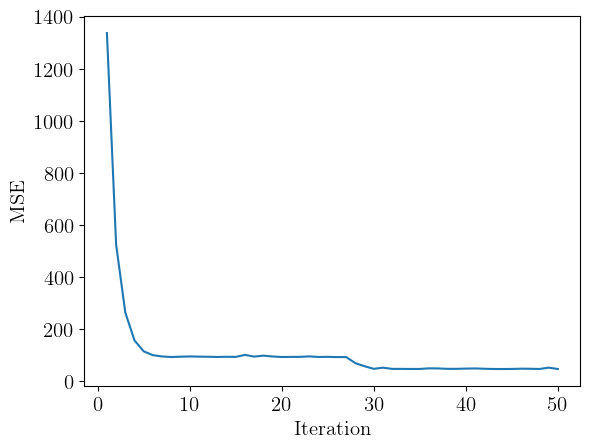

In [100]:
iteration = np.arange(1, len(lst_mse) + 1, 1)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(iteration, lst_mse)
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

We find the mean and standard deviation of all the MSEs are $113.14$ and $189.18$.

**Part B**

Now, we are going to use a normalized version of the data, repeat the process outlined in Part A, and compare the mean and standard deviation estimates with Part A.

In [101]:
#normalizing the predictor data
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [102]:
n_cols = predictors_norm.shape[1]

In [103]:
#build the neural network

def regression_model():
    model = Sequential()
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [104]:
#initialize the model
model = regression_model()

In [105]:
lst_mse_norm = []

for i in range(50):
    X_tr, X_test, y_tr, y_test = train_test_split(predictors_norm, target, test_size = 0.3, random_state = 0)
    model.fit(X_tr, y_tr, validation_split = 0.3, epochs = 50, verbose = 0)
    predictions = model.predict(X_test)
    lst_mse_norm.append(mean_squared_error(y_test, predictions))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [106]:
print(np.mean(lst_mse_norm), np.std(lst_mse_norm))

63.927878325291175 100.05504234071466


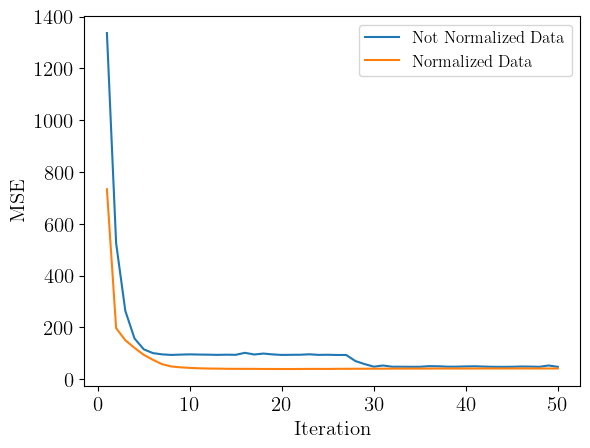

In [107]:
iteration = np.arange(1, len(lst_mse_norm) + 1, 1)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(iteration, lst_mse, label = 'Not Normalized Data')
plt.plot(iteration, lst_mse_norm, label = 'Normalized Data')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

We obtain the mean and standard deviation of the MSEs with normalized data to be $63.92$ and $100.06$. Mean MSE with normalized data is smaller than the mean MSE with unnormalized data.

**Part C**

We are going to repeat the steps outlined in Part B bt with a model with 100 epochs and then compare mean and standard deviations of MSEs.

In [108]:
#build the neural network

def regression_model():
    model = Sequential()
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [109]:
#initialize the model
model = regression_model()

In [110]:
lst_mse_norm_epoch_100 = []

for i in range(50):
    X_tr, X_test, y_tr, y_test = train_test_split(predictors_norm, target, test_size = 0.3, random_state = 0)
    model.fit(X_tr, y_tr, validation_split = 0.3, epochs = 100, verbose = 0)
    predictions = model.predict(X_test)
    lst_mse_norm_epoch_100.append(mean_squared_error(y_test, predictions))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [111]:
print(np.mean(lst_mse_norm_epoch_100), np.std(lst_mse_norm_epoch_100))


44.47030984721321 43.3146555521427


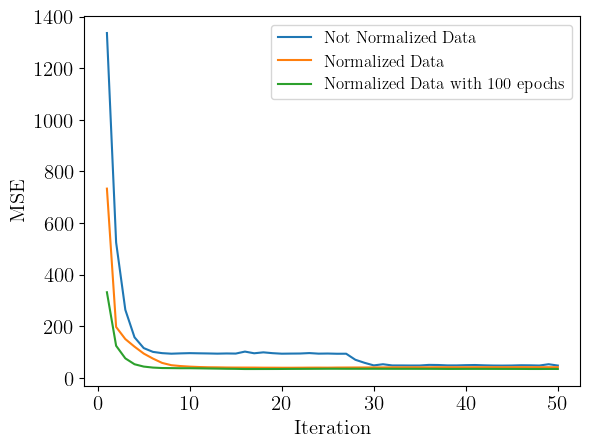

In [112]:
iteration = np.arange(1, len(lst_mse_norm) + 1, 1)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(iteration, lst_mse, label = 'Not Normalized Data')
plt.plot(iteration, lst_mse_norm, label = 'Normalized Data')
plt.plot(iteration, lst_mse_norm_epoch_100, label = 'Normalized Data with 100 epochs')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

We obtain the mean and standard deviation of the MSEs with normalized data to be $44.47$ and $43.31$. Mean and standard deviation of MSE with 100 epochs is smaller than Part B.

**Part D**

In this part, we are going to modify the neural network model. We will build a model with three hidden layers with 10 nodes each, and ReLU as activation function.

In [113]:
#build the neural network

def regression_model():
    model = Sequential()
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [114]:
#initialize the model
model = regression_model()

In [115]:
lst_mse_norm_layers = []

for i in range(50):
    X_tr, X_test, y_tr, y_test = train_test_split(predictors_norm, target, test_size = 0.3, random_state = 0)
    model.fit(X_tr, y_tr, validation_split = 0.3, epochs = 50, verbose = 0)
    predictions = model.predict(X_test)
    lst_mse_norm_layers.append(mean_squared_error(y_test, predictions))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [116]:
print(np.mean(lst_mse_norm_layers), np.std(lst_mse_norm_layers))


43.005788283377434 16.946811779075293


We obtain the mean and standard deviation of the MSEs with normalized data to be $43.06$ and $16.95$. Mean and standard deviation of MSE with three hidden layers is smaller than Part B.

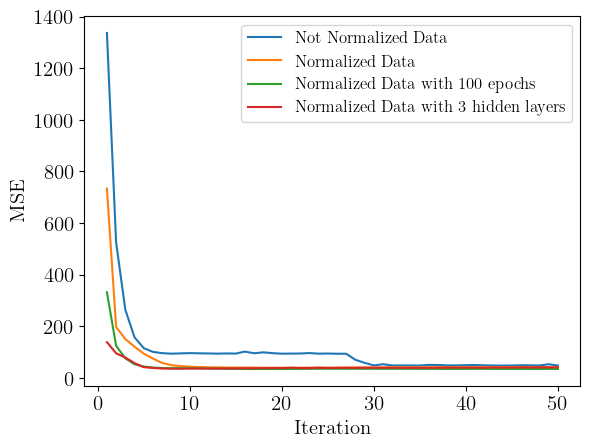

In [117]:
iteration = np.arange(1, len(lst_mse_norm) + 1, 1)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(iteration, lst_mse, label = 'Not Normalized Data')
plt.plot(iteration, lst_mse_norm, label = 'Normalized Data')
plt.plot(iteration, lst_mse_norm_epoch_100, label = 'Normalized Data with 100 epochs')
plt.plot(iteration, lst_mse_norm_layers, label = 'Normalized Data with 3 hidden layers')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

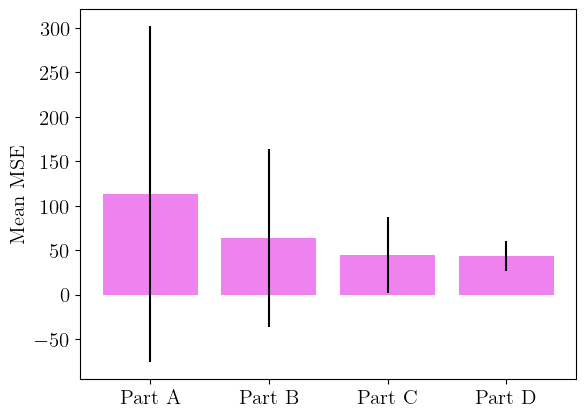

In [118]:
categories = ['Part A', 'Part B', 'Part C', 'Part D']

mse = [np.mean(lst_mse), np.mean(lst_mse_norm), np.mean(lst_mse_norm_epoch_100), np.mean(lst_mse_norm_layers)]
std = [np.std(lst_mse), np.std(lst_mse_norm), np.std(lst_mse_norm_epoch_100), np.std(lst_mse_norm_layers)]

# Create the bar plot
plt.bar(categories, mse, yerr = std, color = 'violet')

# Add labels and title
plt.ylabel('Mean MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


# Show the plot
plt.show()


We notice that mean and standard deviation of MSE decreases from Part A through D.
$$\overline{MSE}_A > \overline{MSE}_B > \overline{MSE}_C > \overline{MSE}_D$$
